<a href="https://colab.research.google.com/github/pedro162/computer_vision/blob/main/gans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
tf.__version__

'2.17.0'

In [2]:
(X_traning, y_trainging), (_,_)  = tf.keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
X_traning.shape

(60000, 28, 28)

In [4]:
y_trainging.shape

(60000,)

4


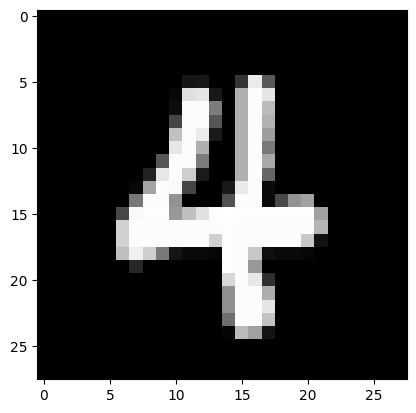

In [5]:
i = np.random.randint(0, X_traning.shape[0])
print(y_trainging[i])
plt.imshow(X_traning[i], cmap='gray')

In [6]:
X_traning = X_traning.reshape(X_traning.shape[0], 28, 28, 1).astype('float32')
X_traning.shape

(60000, 28, 28, 1)

In [7]:
X_traning[0].min(), X_traning[0].max()

(0.0, 255.0)

In [8]:
#X_traning = X_traning / 255
X_traning = (X_traning - 127.5) / 127.5
X_traning[0].min(), X_traning[0].max()

(-1.0, 1.0)

In [9]:
buffer_size = 60000
batch_size = 256 #Mini batch gradient descent

In [10]:
buffer_size/batch_size

234.375

In [11]:
X_traning = tf.data.Dataset.from_tensor_slices(X_traning).shuffle(buffer_size).batch(batch_size)

In [12]:
type(X_traning)

tensorflow.python.data.ops.batch_op._BatchDataset

In [13]:
X_traning

<_BatchDataset element_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name=None)>

In [14]:
#100->12544
def create_generator():
  network = tf.keras.Sequential()
  network.add(layers.Dense(7*7*256, use_bias=False, input_shape=(100,)))
  network.add(layers.BatchNormalization())
  network.add(layers.LeakyReLU())

  network.add(layers.Reshape((7, 7, 256)))

  #7x7x128
  network.add(layers.Conv2DTranspose(128, (5,5), padding='same', use_bias=False))
  network.add(layers.BatchNormalization())
  network.add(layers.LeakyReLU())

  #14x14x64
  network.add(layers.Conv2DTranspose(64, (5,5), padding='same', use_bias=False, strides=(2,2)))
  network.add(layers.BatchNormalization())
  network.add(layers.LeakyReLU())

  #28x28x1
  network.add(layers.Conv2DTranspose(1, (5,5), padding='same', use_bias=False, strides=(2,2), activation='tanh'))
  network.summary()
  return network

In [17]:
generator = create_generator()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                      │ (None, 12544)               │       1,254,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 12544)               │          50,176 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_3 (LeakyReLU)            │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape_1 (Reshape)                  │ (None, 7, 7, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_3 (Conv2DTranspose) │ (None, 7, 7, 128)           │         819,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 7, 7, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_4 (LeakyReLU)            │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_4 (Conv2DTranspose) │ (None, 14, 14, 64)          │         204,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 14, 14, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_5 (LeakyReLU)            │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_5 (Conv2DTranspose) │ (None, 28, 28, 1)           │           1,600 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,330,944 (8.89 MB)

 Trainable params: 2,305,472 (8.79 MB)

 Non-trainable params: 25,472 (99.50 KB)

In [26]:
noise = tf.random.normal([1, 100])
noise

<tf.Tensor: shape=(1, 100), dtype=float32, numpy=
array([[-1.0313421 ,  1.0513746 ,  0.02977526,  1.5251737 ,  0.0467471 ,
         0.87227374, -0.26863754, -1.011462  , -1.6027691 , -0.57089067,
        -0.69475245, -0.26848063,  2.5662425 ,  0.46060854, -0.22101931,
        -1.1317652 , -0.6804736 ,  0.53272736,  0.12388695,  0.33279347,
         0.19290799,  0.17937416, -0.16182874, -0.3370271 , -0.2057355 ,
         1.5522081 , -1.7102506 , -1.743386  ,  2.891384  , -0.24075471,
         0.98432714, -0.70755637,  1.4181147 ,  0.47101128,  1.0718247 ,
         0.01978595, -0.15025139, -0.33720735, -1.236654  ,  0.56362695,
         1.5587604 , -0.49212417,  0.53121674, -0.815289  , -0.30345356,
         0.21837097, -0.47139236,  0.05709077,  1.5794637 , -1.3894349 ,
        -1.7374042 , -0.7496902 ,  1.5237386 ,  0.46345028,  0.24636845,
        -0.6797129 , -0.05398764,  1.0306344 , -1.1089454 ,  0.36593962,
         0.9282309 ,  2.3838432 , -1.5774679 ,  0.25145134, -0.7036649 ,
 

In [27]:
generated_image = generator(noise, training=False)

In [28]:
generated_image.shape

TensorShape([1, 28, 28, 1])

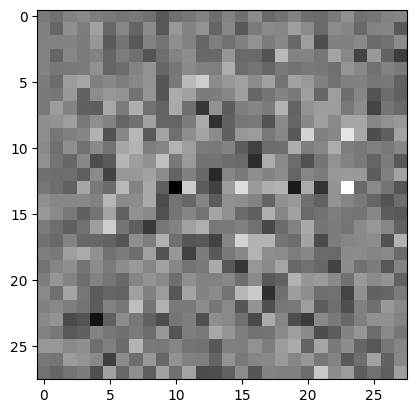

In [29]:
plt.imshow(generated_image[0, : , :, 0], cmap='gray')